Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [1]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting
import keras
import sys
import mediapipe as mp

Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


ok5.png


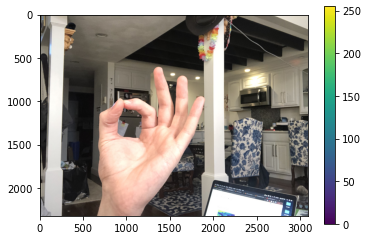

In [2]:
import cv2
img = cv2.imread('./testPhotos/ok5.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Read images with OpenCV.
images = {'ok5.png' : img}

# Preview the images.
for name, image in images.items():
    print(name)
    plt.imshow(image),plt.colorbar(),plt.show()


In [4]:
# mp_drawing = mp.solutions.drawing_utils 
# mp_hands = mp.solutions.hands
# with mp_hands.Hands(
#     static_image_mode=True,
#     max_num_hands=2,
#     min_detection_confidence=0.5) as hands:
#     # Convert the BGR image to RGB, flip the image around y-axis for correct 
#     # handedness output and process it with MediaPipe Hands.
#     print('hi')
#     results = hands.process(cv2.flip(img, 1))
#     results = hands.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    

mp_drawing = mp.solutions.drawing_utils 
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True)
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
print('hi')

hi


In [ ]:
results = hands.process(cv2.flip(img, 1))

Handedness of ok5.png:
[classification {
  index: 0
  score: 0.999980628490448
  label: "Left"
}
]
Hand landmarks of ok5.png:
Index finger tip coordinate: ( 2090.492762565613, 1056.5140795707703)


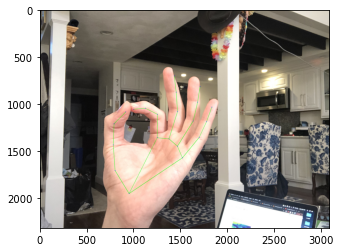

In [44]:
image_hight, image_width, _ = image.shape
# Print handedness (left v.s. right hand).
print(f'Handedness of {name}:')
print(results.multi_handedness)

# Draw hand landmarks of each hand.
print(f'Hand landmarks of {name}:')
# if not results.multi_hand_landmarks:
#     continue
annotated_image = cv2.flip(image.copy(), 1)
for hand_landmarks in results.multi_hand_landmarks:
  # Print index finger tip coordinates.
  print(
      f'Index finger tip coordinate: (',
      f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
      f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
  )
mp_drawing.draw_landmarks(
      annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.flip(annotated_image, 1))

In [45]:
def convertHandMapToArray(results):
    '''
        Input: hand landmark mapping made of 21 different points on hand
        Output: 63 dimension x-vector, x,y,z coordinates of each 21 points in an array
    '''
    x = np.zeros(63) #output array
    for hand_landmarks in results.multi_hand_landmarks:  #iterate through each hand in image (up to 2)
        
        for i in range(21): #for the 21 land marks put the x,y,z coordinates in the output array
            x[i*3] = hand_landmarks.landmark[i].x
            x[i*3+1] = hand_landmarks.landmark[i].y
            x[i*3+2] = hand_landmarks.landmark[i].z
    return x
        
convertToArray(results)

array([ 6.92812026e-01,  8.42151046e-01, -1.06011430e-04,  7.41103649e-01,
        7.36521482e-01, -4.36529517e-03,  7.47395456e-01,  6.18821442e-01,
       -1.31854415e-02,  7.44798899e-01,  5.21628082e-01, -3.52951623e-02,
        7.04119086e-01,  4.67652589e-01, -5.81651926e-02,  5.95749378e-01,
        5.85912049e-01,  7.17719421e-02,  5.95325708e-01,  4.78343904e-01,
        2.23865286e-02,  6.36503458e-01,  4.50474739e-01, -3.77859324e-02,
        6.76973045e-01,  4.55394000e-01, -6.69984892e-02,  5.55074394e-01,
        5.91239750e-01,  4.52584736e-02,  5.25648415e-01,  4.66265529e-01,
        3.78087983e-02,  5.30312061e-01,  3.76886070e-01, -2.75038369e-03,
        5.37163198e-01,  3.02405298e-01, -3.49963047e-02,  5.25956631e-01,
        6.24840498e-01,  7.77911860e-03,  4.71516728e-01,  5.09308219e-01,
       -3.29262693e-04,  4.56285805e-01,  4.22769010e-01, -2.83679310e-02,
        4.48113739e-01,  3.50164473e-01, -5.45906052e-02,  5.08898139e-01,
        6.78318381e-01, -

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [3]:


help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method